In [1]:
!git clone https://github.com/shravankgl/DeepLearning-CNN.git

Cloning into 'DeepLearning-CNN'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 25 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (25/25), done.


In [ ]:
!pip install git+https://github.com/albumentations-team/albumentations.git

  Cloning https://github.com/albumentations-team/albumentations.git to /tmp/pip-req-build-yoeaadr6
  Running command git clone -q https://github.com/albumentations-team/albumentations.git /tmp/pip-req-build-yoeaadr6
  Created wheel for albumentations: filename=albumentations-1.0.0-cp37-none-any.whl size=98531 sha256=6b35f2e73dc80d98e60691875baf771e5e0744821c6d346e27722ea9ccf32120
  Stored in directory: /tmp/pip-ephem-wheel-cache-ln8w3698/wheels/e2/85/3e/2a40fac5cc1f43ced656603bb2fca1327b30ec7de1b1b66517
Successfully built albumentations


In [2]:
import sys, os

my_path = '/content/DeepLearning-CNN'
sys.path.append(my_path)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from models.resnet import ResNet18
from main import *
from utils import *

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [ ]:
model = ResNet18().to(device)

In [ ]:
epochs = 40
lr = 0.01
#optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=3, verbose=True)
criterion = nn.CrossEntropyLoss()

In [ ]:
!pip install torchsummary
from torchsummary import summary

summary(model, input_size=(3, 32, 32))  # Display model summary

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
         GroupNorm-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
         GroupNorm-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
         GroupNorm-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
         GroupNorm-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
        GroupNorm-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
        GroupNorm-14          [-1, 128,

In [ ]:
train_loss_list = []
test_loss_list = []
train_accuracy_list=[]
test_accuracy_list=[]


for epoch in range(epochs):
    print(f"Epoch {epoch}")
   
    train_loss,train_acc = train(model, device, trainloader, optimizer, epoch)

    test_loss,test_acc = test(model, device, testloader)

    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)

    train_accuracy_list.append(train_acc)
    test_accuracy_list.append(test_acc)

  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 0


loss=2.1109790802001953 batch_id=390: 100%|██████████| 391/391 [01:09<00:00,  5.62it/s]


Train set: Average loss: 0.0177, Accuracy: 8385/50000 (16.77%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -1.6312, Accuracy: 2780/10000 (27.80%)

Epoch 1


loss=1.8608968257904053 batch_id=390: 100%|██████████| 391/391 [01:09<00:00,  5.66it/s]


Train set: Average loss: 0.0149, Accuracy: 14809/50000 (29.62%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -1.7134, Accuracy: 3744/10000 (37.44%)

Epoch 2


loss=1.6681989431381226 batch_id=390: 100%|██████████| 391/391 [01:09<00:00,  5.64it/s]


Train set: Average loss: 0.0138, Accuracy: 18012/50000 (36.02%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.0326, Accuracy: 4095/10000 (40.95%)

Epoch 3


loss=1.4567021131515503 batch_id=390: 100%|██████████| 391/391 [01:09<00:00,  5.62it/s]


Train set: Average loss: 0.0127, Accuracy: 20662/50000 (41.32%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.4295, Accuracy: 4480/10000 (44.80%)

Epoch 4


loss=1.3668668270111084 batch_id=390: 100%|██████████| 391/391 [01:09<00:00,  5.63it/s]


Train set: Average loss: 0.0117, Accuracy: 23082/50000 (46.16%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.6634, Accuracy: 5206/10000 (52.06%)

Epoch 5


loss=1.4380391836166382 batch_id=390: 100%|██████████| 391/391 [01:09<00:00,  5.64it/s]


Train set: Average loss: 0.0109, Accuracy: 24899/50000 (49.80%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -3.0377, Accuracy: 5442/10000 (54.42%)

Epoch 6


loss=1.3053791522979736 batch_id=390: 100%|██████████| 391/391 [01:09<00:00,  5.64it/s]


Train set: Average loss: 0.0102, Accuracy: 26632/50000 (53.26%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -3.1573, Accuracy: 5586/10000 (55.86%)

Epoch 7


loss=1.1441553831100464 batch_id=390: 100%|██████████| 391/391 [01:09<00:00,  5.65it/s]


Train set: Average loss: 0.0095, Accuracy: 28103/50000 (56.21%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -3.4908, Accuracy: 5845/10000 (58.45%)

Epoch 8


loss=1.0378413200378418 batch_id=390: 100%|██████████| 391/391 [01:09<00:00,  5.66it/s]


Train set: Average loss: 0.0089, Accuracy: 29557/50000 (59.11%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -3.5339, Accuracy: 6162/10000 (61.62%)

Epoch 9


loss=1.0398728847503662 batch_id=390: 100%|██████████| 391/391 [01:09<00:00,  5.65it/s]


Train set: Average loss: 0.0084, Accuracy: 30829/50000 (61.66%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -3.6100, Accuracy: 6070/10000 (60.70%)

Epoch 10


loss=0.8645939826965332 batch_id=390: 100%|██████████| 391/391 [01:09<00:00,  5.65it/s]


Train set: Average loss: 0.0078, Accuracy: 32163/50000 (64.33%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -4.3410, Accuracy: 6536/10000 (65.36%)

Epoch 11


loss=1.091718316078186 batch_id=390: 100%|██████████| 391/391 [01:09<00:00,  5.64it/s]


Train set: Average loss: 0.0074, Accuracy: 33177/50000 (66.35%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -4.3571, Accuracy: 6542/10000 (65.42%)

Epoch 12


loss=0.7277988791465759 batch_id=390: 100%|██████████| 391/391 [01:09<00:00,  5.65it/s]


Train set: Average loss: 0.0070, Accuracy: 34230/50000 (68.46%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -4.6634, Accuracy: 6842/10000 (68.42%)

Epoch 13


loss=0.8883625268936157 batch_id=390: 100%|██████████| 391/391 [01:09<00:00,  5.67it/s]


Train set: Average loss: 0.0066, Accuracy: 35108/50000 (70.22%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -4.3702, Accuracy: 6974/10000 (69.74%)

Epoch 14


loss=0.6497334837913513 batch_id=390: 100%|██████████| 391/391 [01:09<00:00,  5.66it/s]


Train set: Average loss: 0.0062, Accuracy: 36100/50000 (72.20%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.1173, Accuracy: 7243/10000 (72.43%)

Epoch 15


loss=0.8718096613883972 batch_id=390: 100%|██████████| 391/391 [01:08<00:00,  5.68it/s]


Train set: Average loss: 0.0058, Accuracy: 36823/50000 (73.65%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.2945, Accuracy: 7401/10000 (74.01%)

Epoch 16


loss=0.6682058572769165 batch_id=390: 100%|██████████| 391/391 [01:08<00:00,  5.67it/s]


Train set: Average loss: 0.0055, Accuracy: 37567/50000 (75.13%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.1577, Accuracy: 7272/10000 (72.72%)

Epoch 17


loss=0.5900375247001648 batch_id=390: 100%|██████████| 391/391 [01:08<00:00,  5.67it/s]


Train set: Average loss: 0.0052, Accuracy: 38131/50000 (76.26%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.5117, Accuracy: 7558/10000 (75.58%)

Epoch 18


loss=0.4641098380088806 batch_id=390: 100%|██████████| 391/391 [01:08<00:00,  5.69it/s]


Train set: Average loss: 0.0049, Accuracy: 38941/50000 (77.88%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.5521, Accuracy: 7677/10000 (76.77%)

Epoch 19


loss=0.551015317440033 batch_id=390: 100%|██████████| 391/391 [01:08<00:00,  5.68it/s]


Train set: Average loss: 0.0047, Accuracy: 39391/50000 (78.78%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -6.3773, Accuracy: 7654/10000 (76.54%)

Epoch 20


loss=0.5431657433509827 batch_id=390: 100%|██████████| 391/391 [01:08<00:00,  5.67it/s]


Train set: Average loss: 0.0045, Accuracy: 39906/50000 (79.81%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.9380, Accuracy: 7683/10000 (76.83%)

Epoch 21


loss=0.5130332708358765 batch_id=390: 100%|██████████| 391/391 [01:08<00:00,  5.69it/s]


Train set: Average loss: 0.0043, Accuracy: 40352/50000 (80.70%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -6.2641, Accuracy: 7889/10000 (78.89%)

Epoch 22


loss=0.6191381216049194 batch_id=390: 100%|██████████| 391/391 [01:08<00:00,  5.68it/s]


Train set: Average loss: 0.0041, Accuracy: 40760/50000 (81.52%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -6.3619, Accuracy: 7944/10000 (79.44%)

Epoch 23


loss=0.3500906825065613 batch_id=390: 100%|██████████| 391/391 [01:08<00:00,  5.69it/s]


Train set: Average loss: 0.0039, Accuracy: 41217/50000 (82.43%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -6.7286, Accuracy: 7928/10000 (79.28%)

Epoch 24


loss=0.469266414642334 batch_id=390: 100%|██████████| 391/391 [01:08<00:00,  5.67it/s]


Train set: Average loss: 0.0037, Accuracy: 41587/50000 (83.17%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -6.2149, Accuracy: 8019/10000 (80.19%)

Epoch 25


loss=0.33035674691200256 batch_id=390: 100%|██████████| 391/391 [01:08<00:00,  5.68it/s]


Train set: Average loss: 0.0035, Accuracy: 42008/50000 (84.02%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -7.0745, Accuracy: 8022/10000 (80.22%)

Epoch 26


loss=0.648070752620697 batch_id=390: 100%|██████████| 391/391 [01:08<00:00,  5.68it/s]


Train set: Average loss: 0.0034, Accuracy: 42340/50000 (84.68%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -6.8767, Accuracy: 7766/10000 (77.66%)

Epoch 27


loss=0.42628470063209534 batch_id=390: 100%|██████████| 391/391 [01:08<00:00,  5.68it/s]


Train set: Average loss: 0.0033, Accuracy: 42597/50000 (85.19%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -7.1939, Accuracy: 8018/10000 (80.18%)

Epoch 28


loss=0.4752834737300873 batch_id=390: 100%|██████████| 391/391 [01:08<00:00,  5.69it/s]


Train set: Average loss: 0.0031, Accuracy: 43113/50000 (86.23%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -7.0190, Accuracy: 8160/10000 (81.60%)

Epoch 29


loss=0.5045437216758728 batch_id=390: 100%|██████████| 391/391 [01:08<00:00,  5.68it/s]


Train set: Average loss: 0.0030, Accuracy: 43387/50000 (86.77%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -7.4041, Accuracy: 8099/10000 (80.99%)

Epoch 30


loss=0.5186904072761536 batch_id=390: 100%|██████████| 391/391 [01:08<00:00,  5.68it/s]


Train set: Average loss: 0.0029, Accuracy: 43553/50000 (87.11%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -7.7485, Accuracy: 8099/10000 (80.99%)

Epoch 31


loss=0.2490675151348114 batch_id=390: 100%|██████████| 391/391 [01:08<00:00,  5.67it/s]


Train set: Average loss: 0.0028, Accuracy: 43703/50000 (87.41%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -7.7923, Accuracy: 8109/10000 (81.09%)

Epoch 32


loss=0.299244225025177 batch_id=390: 100%|██████████| 391/391 [01:08<00:00,  5.68it/s]


Train set: Average loss: 0.0027, Accuracy: 43915/50000 (87.83%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -8.0115, Accuracy: 8226/10000 (82.26%)

Epoch 33


loss=0.3222663998603821 batch_id=390: 100%|██████████| 391/391 [01:08<00:00,  5.69it/s]


Train set: Average loss: 0.0025, Accuracy: 44427/50000 (88.85%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -8.0999, Accuracy: 8105/10000 (81.05%)

Epoch 34


loss=0.3348537087440491 batch_id=390: 100%|██████████| 391/391 [01:08<00:00,  5.69it/s]


Train set: Average loss: 0.0024, Accuracy: 44434/50000 (88.87%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -7.5515, Accuracy: 8176/10000 (81.76%)

Epoch 35


loss=0.20978382229804993 batch_id=390: 100%|██████████| 391/391 [01:08<00:00,  5.69it/s]


Train set: Average loss: 0.0023, Accuracy: 44677/50000 (89.35%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -8.4833, Accuracy: 8075/10000 (80.75%)

Epoch 36


loss=0.3616984188556671 batch_id=390: 100%|██████████| 391/391 [01:08<00:00,  5.69it/s]


Train set: Average loss: 0.0023, Accuracy: 44875/50000 (89.75%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -8.4618, Accuracy: 8108/10000 (81.08%)

Epoch 37


loss=0.29722294211387634 batch_id=390: 100%|██████████| 391/391 [01:08<00:00,  5.69it/s]


Train set: Average loss: 0.0022, Accuracy: 44882/50000 (89.76%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -8.2261, Accuracy: 8214/10000 (82.14%)

Epoch 38


loss=0.22909784317016602 batch_id=390: 100%|██████████| 391/391 [01:08<00:00,  5.70it/s]


Train set: Average loss: 0.0021, Accuracy: 45140/50000 (90.28%)




  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.5967, Accuracy: 8259/10000 (82.59%)

Epoch 39


loss=0.3203888535499573 batch_id=390: 100%|██████████| 391/391 [01:08<00:00,  5.68it/s]


Train set: Average loss: 0.0021, Accuracy: 45394/50000 (90.79%)




Test set: Average loss: -8.3232, Accuracy: 8227/10000 (82.27%)



In [ ]:
from pylab import *

def getWrongPredictions(model, device, val_loader):
    wrong_idx = []
    wrong_samples = []
    wrong_preds = []
    actual_values = []

    for data,target in val_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        pred = output.argmax(dim=1, keepdim=True)

        wrong_idx = (pred != target.view_as(pred)).nonzero()[:, 0]
        wrong_samples.append(data[wrong_idx])
        wrong_preds.append(pred[wrong_idx])
        actual_values.append(target.view_as(pred)[wrong_idx])
    return list(zip(torch.cat(wrong_samples),torch.cat(wrong_preds),torch.cat(actual_values)))

def plotWrongPredictions(wrong_predictions):
    fig = plt.figure(figsize=(10,10))
    mean,std = (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)
    for i, (sample, wrong_pred, actual_value) in enumerate(wrong_predictions[:20]):
        sample, wrong_pred, actual_value = sample.cpu().numpy(), wrong_pred.cpu(), actual_value.cpu()
        # Undo normalization
        for j in range(sample.shape[0]):
            sample[j] = (sample[j]*std[j])+mean[j]
        sample = np.transpose(sample, (1, 2, 0))
        ax = fig.add_subplot(4, 5, i+1)
        ax.axis('off')
        ax.set_title(f'actual {classes[actual_value.item()]}\npredicted {classes[wrong_pred.item()]}',fontsize=15)
        ax.imshow(sample)
    plt.show()

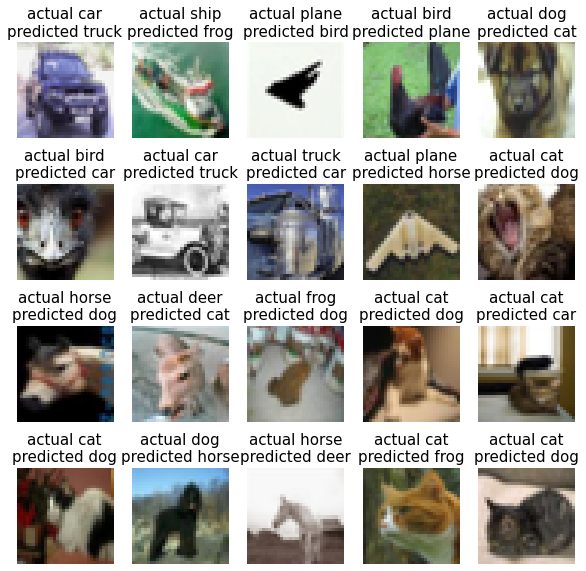

In [ ]:
wp = getWrongPredictions(model, device, testloader, classes)
plotWrongPredictions(wp, classes)

In [ ]:
!pip install pytorch-gradcam

In [ ]:
configs = [
    dict(model_type='resnet', arch=model, layer_name='layer1'),
    dict(model_type='resnet', arch=model, layer_name='layer2'),
    dict(model_type='resnet', arch=model, layer_name='layer3'),
    dict(model_type='resnet', arch=model, layer_name='layer4'),
]

In [ ]:
from gradcam.utils import visualize_cam
from gradcam import GradCAM, GradCAMpp

for config in configs:
    config['arch'].to(device).eval()

cams = [
    [cls.from_config(**config) for cls in (GradCAM, GradCAMpp)]
    for config in configs
]

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3487: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


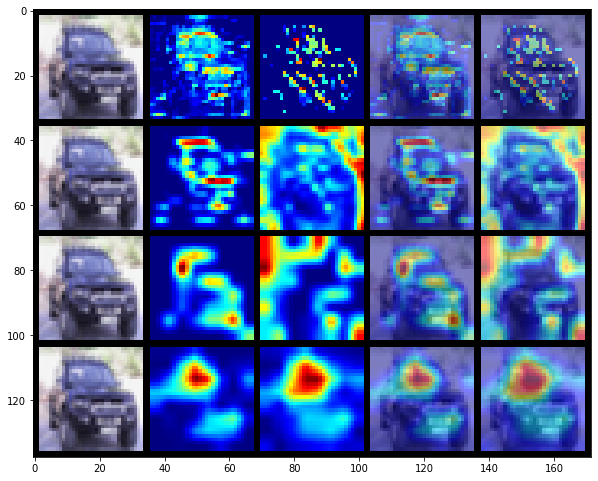

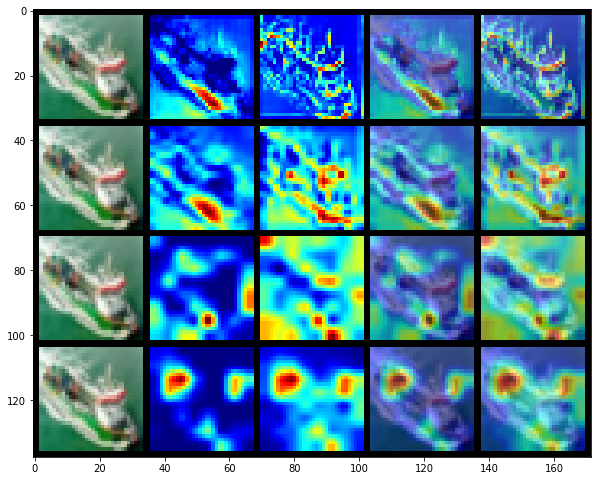

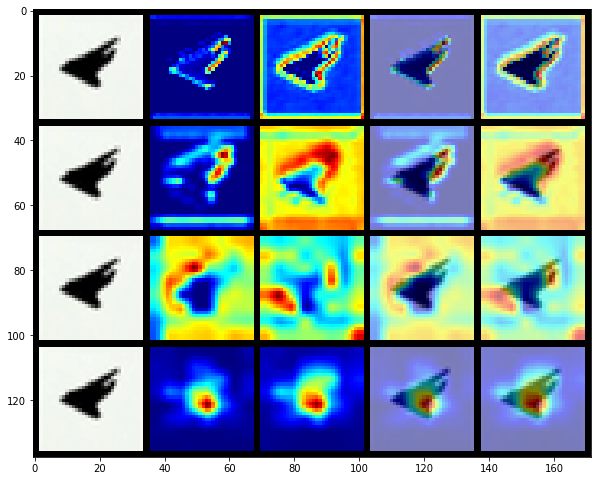

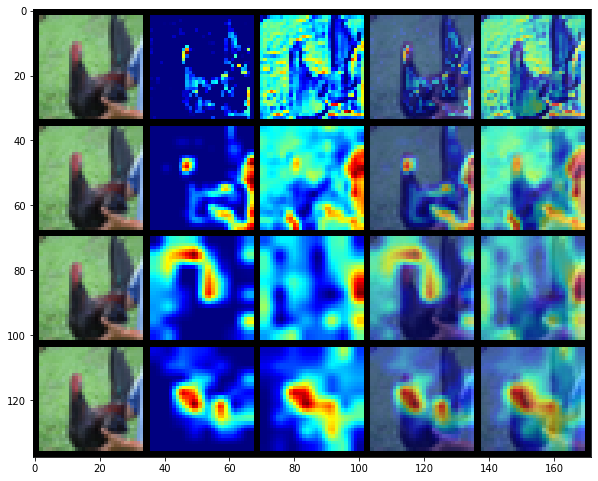

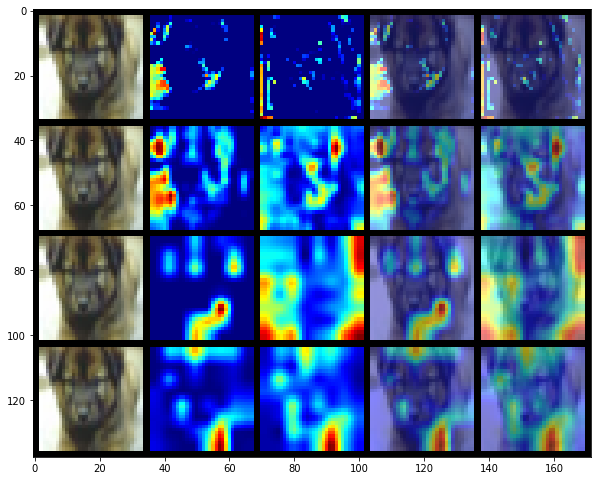

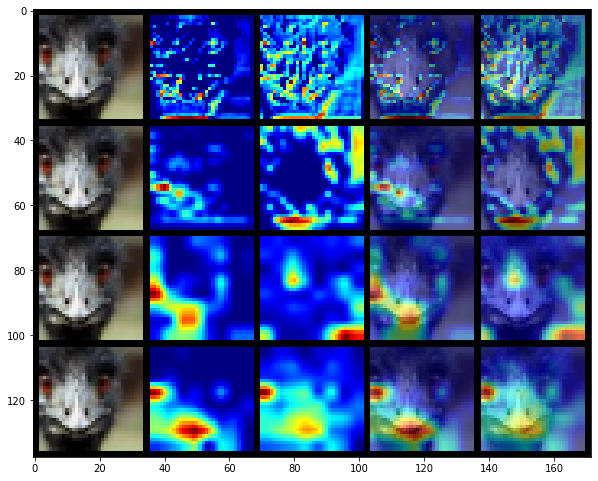

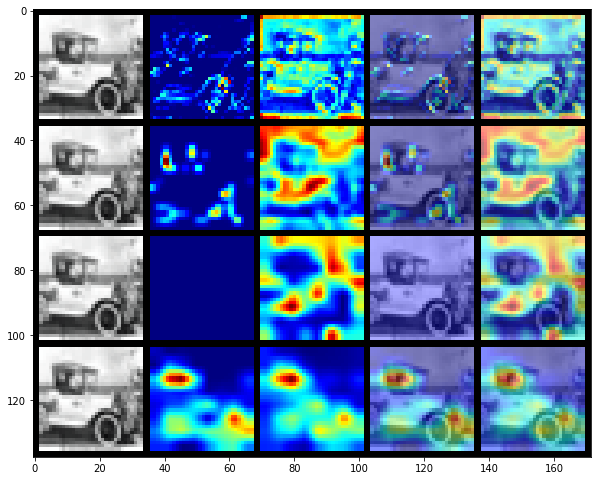

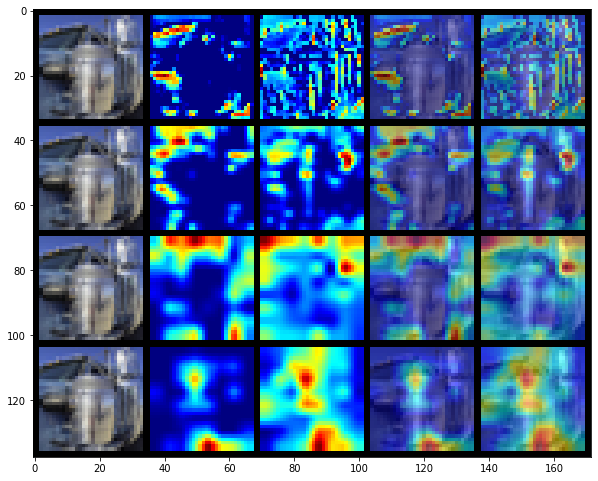

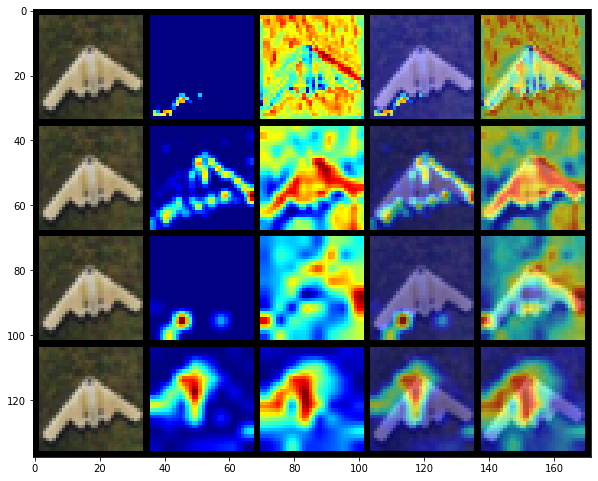

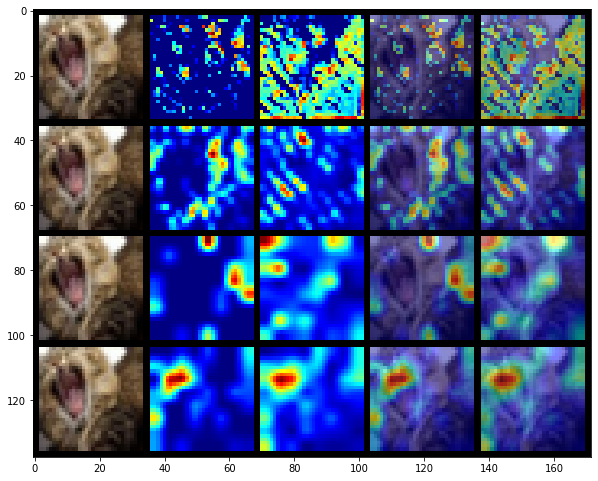

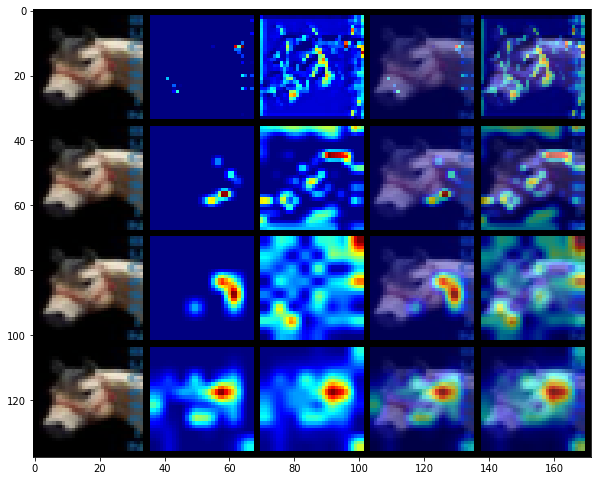

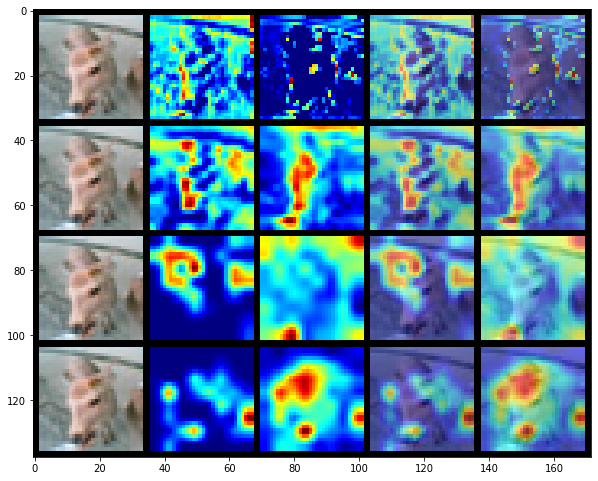

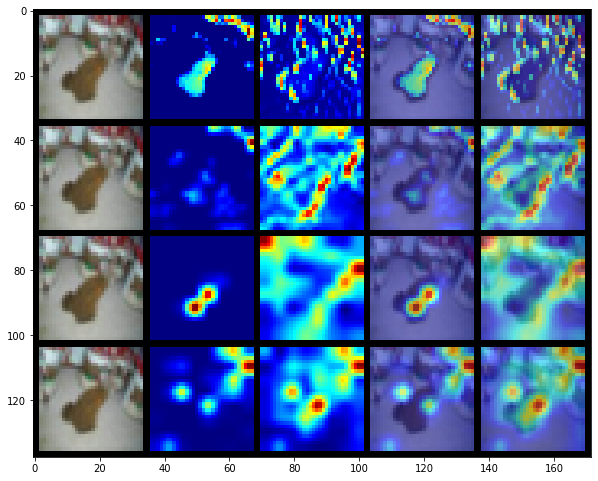

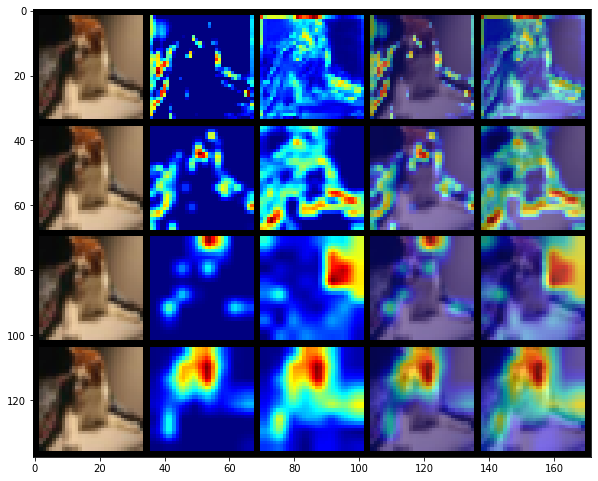

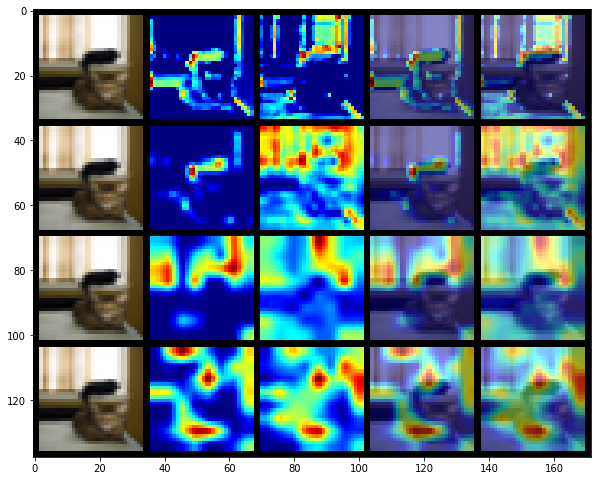

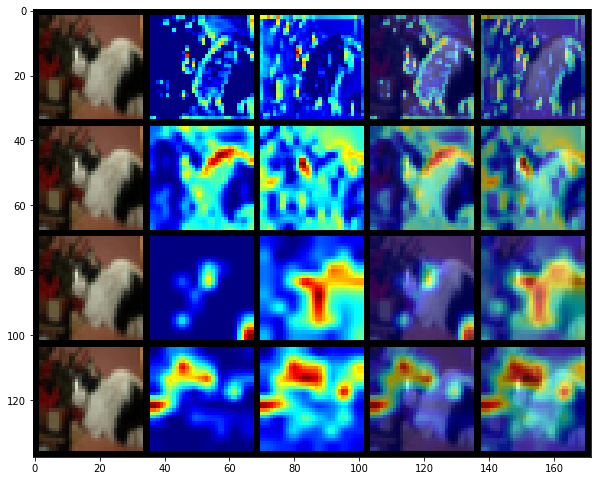

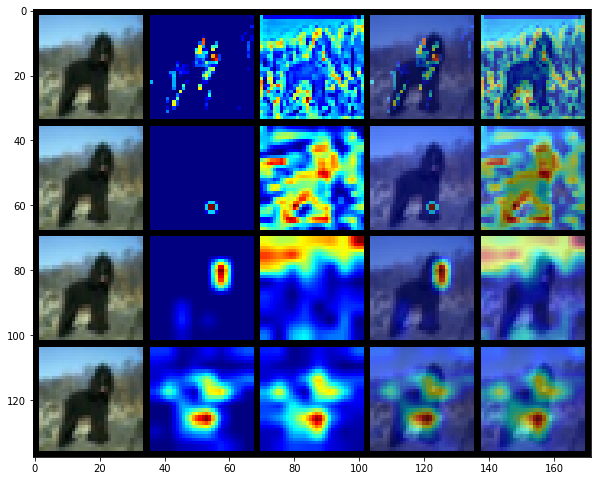

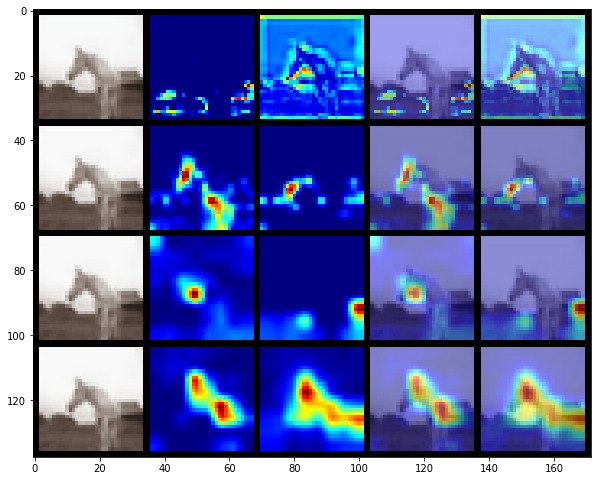

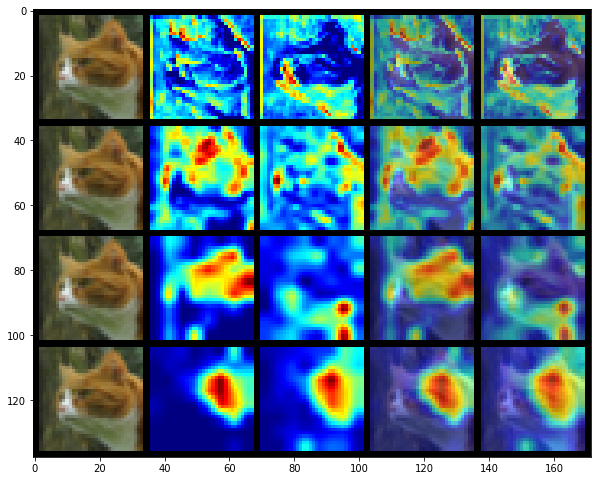

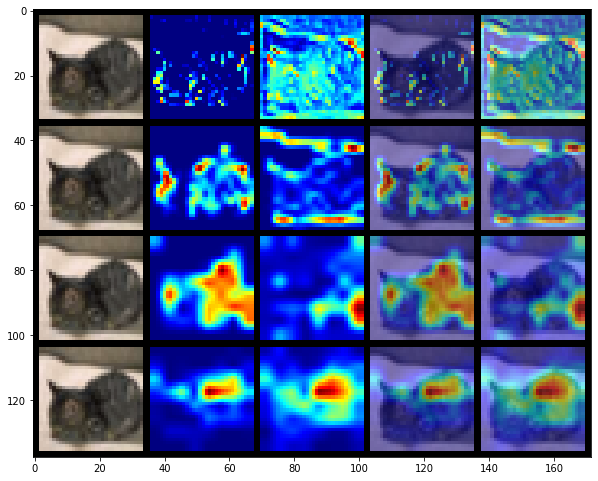

In [ ]:
plotGradCam(wp[:20])